<a href="https://colab.research.google.com/github/JordanFoss/STAT3007_Project/blob/main/model_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
import PIL

In [44]:
pip install visualkeras

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [5]:
import visualkeras

In [38]:
input = layers.Input(shape=(128, 64, 1))

# Encoder
x = layers.Conv2D(8, (3, 4), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(8, (3, 4), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(8, (3, 4), activation="relu", padding="same")(x)

x = layers.Conv2DTranspose(8, (3, 4),  activation="relu", padding="same")(x)
x = layers.UpSampling2D(size=(2, 2))(x)
x = layers.Conv2DTranspose(8, (3, 4),  activation="relu", padding="same")(x)
x = layers.UpSampling2D(size=(2, 2))(x)
x = layers.Conv2DTranspose(1, (3, 4), padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 128, 64, 1)]      0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 128, 64, 8)        104       
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 64, 32, 8)         0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 64, 32, 8)         776       
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 32, 16, 8)         0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 32, 16, 8)         776       
_________________________________________________________________
conv2d_transpose_81 (Conv2DT (None, 32, 16, 8)         776

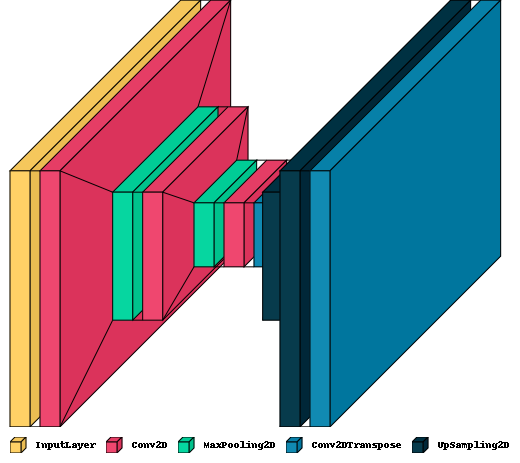

In [49]:
from PIL import ImageFont


visualkeras.layered_view(autoencoder, legend = True)